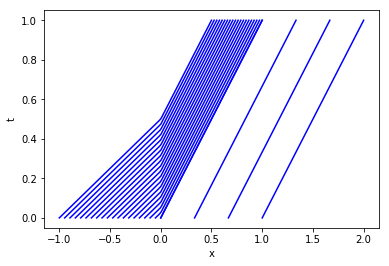

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

NxL = 20 #spatial resolution left
NxR = 4  #spatial resolution right (density left = 5 x density right )

Nx = NxL + NxR
x0 = np.zeros((Nx))
x0[0:NxL] = np.linspace(-1,0,NxL) #domain decomposition (a point in space for each car)
x0[NxL:] = np.linspace(0,1,NxR) 


Nt = 100 #time resolution
t = np.linspace(0,1,Nt) #time decomposition

u_L = 2 #left car speed (x<0)
u_R = 1 #right car speed (x>=0)


A = np.zeros((Nt,Nx)) #datatable



#loop over cars
for i in range(0,len(x0)):

    # get the initial position
    xi = x0[i]


    # if initial position is left
    if xi < 0.:

        #get points in time in which the car stays in the left domain
        kk = np.where(t<(-xi/u_L))[0]

        #for these points in time the car has speed u_L
        A[kk,i] = xi + t[kk]*u_L


        #when the car is in the right domain, it has speed u_R
        A[kk[-1]+1:,i]   = xi + (t[kk[-1]+1:] - xi/u_L)*u_R


    # if initial position is right
    else:

        #the car has speed u_R
        A[:,i] = xi + u_R*t





#plot1: characteristics in x-t diagram

for i in range(0,Nx):


    plt.plot(A[:,i],t,color='blue')
    plt.xlabel('x')
    plt.ylabel('t')


plt.show()

